In [1]:
#Libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
import pandas as pd
from skimage.feature import hog
#Machine Learning 
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score

## Image Descriptors
    - Shape
        - SIFT
        - HOG
        - GIST
    - Texture
        - GLCM
        - Haralick
        - LBP

In [2]:
def roc(X_train, y_train, X_test, y_test, mean_fpr, aucs, tprs, cls, l):
    i = 0
    for c in cls:
        print(c)
        probas_ = c.fit(X_train, y_train).predict_proba(X_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(label_binarize(y_test, classes=[0, 1]), probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC %s (AUC = %0.2f)' % (l[i], roc_auc))
        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    return(plt)

In [3]:
classifiers = [
    SVC(kernel="linear", C=0.025, probability=True),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
]
    
cls = ["SVM linear",
       "MLP",
       "AdaBoost",
]

## HOG

In [4]:
from skimage.feature import hog
fds_treino = []
fds_teste = []

dir_treino = '../../data/deep_learn/train/' 
dir_teste = '../../data/deep_learn/teste/'


for i in os.listdir(dir_treino+'stoma/'):
    img = cv2.imread(dir_treino+'stoma/'+i)
    fd = hog(img,visualize=False, multichannel=True)
    aux = {k:fd[k] for k in range(len(fd))}
    aux['class'] = 1
    fds_treino.append(aux)

    
for i in os.listdir(dir_treino+'erro/'):
    img = cv2.imread(dir_treino+'erro/'+i)
    fd = hog(img,visualize=False, multichannel=True)
    aux = {k:fd[k] for k in range(len(fd))}
    aux['class'] = 0
    fds_treino.append(aux)


for i in os.listdir(dir_teste+'stoma/'):
    img = cv2.imread(dir_teste+'stoma/'+i)
    fd = hog(img,visualize=False, multichannel=True)
    aux = {k:fd[k] for k in range(len(fd))}
    aux['class'] = 1
    fds_teste.append(aux)

    
for i in os.listdir(dir_teste+'erro/'):
    img = cv2.imread(dir_teste+'erro/'+i)
    fd = hog(img,visualize=False, multichannel=True)
    aux = {k:fd[k] for k in range(len(fd))}
    aux['class'] = 0
    fds_teste.append(aux)

In [5]:
train1 = pd.DataFrame(fds_treino)
teste1 = pd.DataFrame(fds_teste)

SVC(C=0.025, kernel='linear', probability=True)
MLPClassifier(alpha=1)
AdaBoostClassifier()


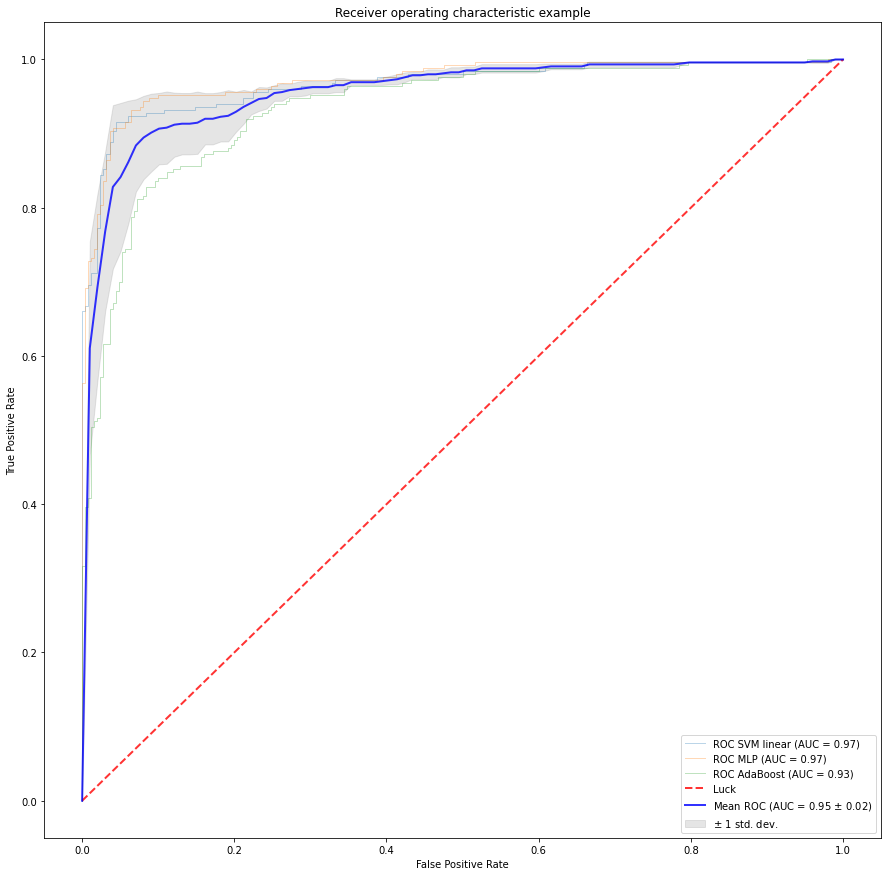

In [6]:
tprs_dall = []
aucs_dall = []
mean_fpr_dall = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(15,15))
imgshow = roc(train1.iloc[:,:-1],train1['class'],teste1.iloc[:,:-1],teste1['class'], mean_fpr_dall, aucs_dall,tprs_dall,classifiers,cls)